In [1]:
import numpy as np
import pandas as pd
import prepare as prep
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import explore as ex

In [2]:
df=prep.explore_df()

In [3]:
df.head()

id               name   price    msrp  year_published  min_players  \
0  TAAifFP590               Root   45.00   60.00          2018.0          2.0   
1  yqR4PtpO8X             Scythe   54.39   90.00          2016.0          1.0   
2  5H5JS0KLzK           Wingspan   50.00   60.00          2019.0          1.0   
3  RLlDWHh7hR         Gloomhaven  105.97  140.00          2017.0          1.0   
4  fDn9rQjH9O  Terraforming Mars   51.99   69.95          2016.0          1.0   

   max_players  min_playtime  max_playtime  min_age  num_user_ratings  \
0          4.0          60.0          90.0     10.0               412   
1          5.0          90.0         120.0     14.0               763   
2          5.0          40.0          70.0     10.0               589   
3          4.0          60.0         150.0     12.0               491   
4          5.0          90.0         120.0     12.0               713   

   average_user_rating  num_user_complexity_votes  \
0             4.059395                         11   
1             4.213439                         17   
2             4.162919                         12   
3             4.351614                         10   
4             4.146214                         10   

   average_learning_complexity  average_strategy_complexity  rank  type  \
0                     3.818182                     3.636364     1  game   
1                     3.117647                     3.235294     2  game   
2                     2.500000                     2.833333     3  game   
3                     3.900000                     3.600000     4  game   
4                     3.000000                     3.300000     5  game   

   num_distributors  
0                 6  
1                 9  
2                11  
3                 5  
4                 3

In [4]:
m=pd.read_csv('mechanic_df')

In [5]:
m.head()

mechanics
0  Action / Movement Programming
1                   Action Queue
2                   Area Control
3                   Dice Rolling
4                Engine Building

# first look at the mechanics to see which mechanics are most popular

In [6]:
m.value_counts().head(20)

mechanics                    
Hand Management                  375
Dice Rolling                     262
Variable Player Powers           257
Set Collection                   247
Card Drafting                    228
Cooperative Play                 145
Tile Placement                   143
Area Control                     124
Worker Placement                 123
Modular Board                    121
Grid Movement                     89
Deck Building                     87
Press Your Luck                   75
Network and Route Building        73
Area Majority/ Influence          72
Solo / Solitaire Game             71
Action Point Allowance System     69
Take That                         66
Area Movement                     66
Point to Point Movement           62
dtype: int64

Hand managment and dice rolling seem obvious to be the top two as they are necessary to play and progress a game. Cards are often a staple in games, so set collection and card drafting are also not suprising. However the drafting aspect is interesting. Many game have a random drawing mechanic compared to a draft mechanic to the cards.  

I suprises me that area control is rated so high but area movement and area majority/influence are much lower. Unless only one of these latter two are associated with area control games. Which if you combined all "area" based mechanics, it would be one of the highest mechanics.

In [7]:
df['rank'].value_counts().shape

(935,)

In [8]:
df.shape

(995, 18)

## top 100 games (~10%) will be considered 'high rated'

In [9]:
df['rank'].dtype

dtype('int64')

In [10]:
for i, r in df.iterrows():
    if r['rank'] <= 100:
        df.loc[i, 'rank'] = 1
    else:
        df.loc[i, 'rank'] = 0

In [11]:
df['rank'].value_counts()

0    892
1    103
Name: rank, dtype: int64

In [12]:
df.head(5)

id               name   price    msrp  year_published  min_players  \
0  TAAifFP590               Root   45.00   60.00          2018.0          2.0   
1  yqR4PtpO8X             Scythe   54.39   90.00          2016.0          1.0   
2  5H5JS0KLzK           Wingspan   50.00   60.00          2019.0          1.0   
3  RLlDWHh7hR         Gloomhaven  105.97  140.00          2017.0          1.0   
4  fDn9rQjH9O  Terraforming Mars   51.99   69.95          2016.0          1.0   

   max_players  min_playtime  max_playtime  min_age  num_user_ratings  \
0          4.0          60.0          90.0     10.0               412   
1          5.0          90.0         120.0     14.0               763   
2          5.0          40.0          70.0     10.0               589   
3          4.0          60.0         150.0     12.0               491   
4          5.0          90.0         120.0     12.0               713   

   average_user_rating  num_user_complexity_votes  \
0             4.059395                         11   
1             4.213439                         17   
2             4.162919                         12   
3             4.351614                         10   
4             4.146214                         10   

   average_learning_complexity  average_strategy_complexity  rank  type  \
0                     3.818182                     3.636364     1  game   
1                     3.117647                     3.235294     1  game   
2                     2.500000                     2.833333     1  game   
3                     3.900000                     3.600000     1  game   
4                     3.000000                     3.300000     1  game   

   num_distributors  
0                 6  
1                 9  
2                11  
3                 5  
4                 3

In [13]:
df.tail(5)

id                          name   price   msrp  year_published  \
995  utvG6nvnq5                     Snake Oil   19.99  19.95          2010.0   
996  2LJTEmU5LY     Bob Ross the Art of Chill   24.46  31.99          2017.0   
997  JBQPZrO0yC            A Study in Emerald  149.95   0.00          2013.0   
998  kz2pqBlpT4           Mansions of Madness    5.89  99.95          2011.0   
999  kgs5t2m5kv  Kokoro: Avenue of the Kodama   13.39  19.99          2017.0   

     min_players  max_players  min_playtime  max_playtime  min_age  \
995          3.0         10.0          20.0          30.0     10.0   
996          2.0          4.0          30.0          30.0     12.0   
997          2.0          5.0          90.0          90.0     13.0   
998          2.0          5.0         120.0         180.0     13.0   
999          2.0          8.0          30.0          45.0     14.0   

     num_user_ratings  average_user_rating  num_user_complexity_votes  \
995                67             3.130597                          0   
996                64             3.370312                          1   
997                30             3.433333                          0   
998                68             3.252941                          0   
999                58             3.312069                          0   

     average_learning_complexity  average_strategy_complexity  rank  type  \
995                          0.0                          0.0     0  game   
996                          3.0                          2.0     0  game   
997                          0.0                          0.0     0  game   
998                          0.0                          0.0     0  game   
999                          0.0                          0.0     0  game   

     num_distributors  
995                 0  
996                 0  
997                 0  
998                 4  
999                 0

## Encode the 'type' column

In [14]:
df['type'].value_counts()

game         875
expansion    119
accessory      1
Name: type, dtype: int64

In [15]:
for i, t in df.iterrows():
    if t['type'] == 'game':
        df.loc[i, 'type'] = 0
    elif t['type'] == 'expansion':
        df.loc[i, 'type'] = 1
    else:
        df.loc[i, 'type'] = 2

In [16]:
df['type'].value_counts()

0    875
1    119
2      1
Name: type, dtype: int64

In [17]:
df.drop(columns=['id'], inplace=True)

## Split data

In [18]:
train, val, test= ex.tts(df, 'rank')

In [19]:
train.shape, val.shape, test.shape

((716, 17), (179, 17), (100, 17))

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Is the price of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average price of higher rated games and other games</dd>
        <dd>- $H_a$: The average price of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [20]:
alpha=.05

In [21]:
hirank=train[train['rank']==1]['price']

In [22]:
train[train['rank']==1]['price'].var()

1085.8798928421054

<AxesSubplot:xlabel='price', ylabel='Count'>

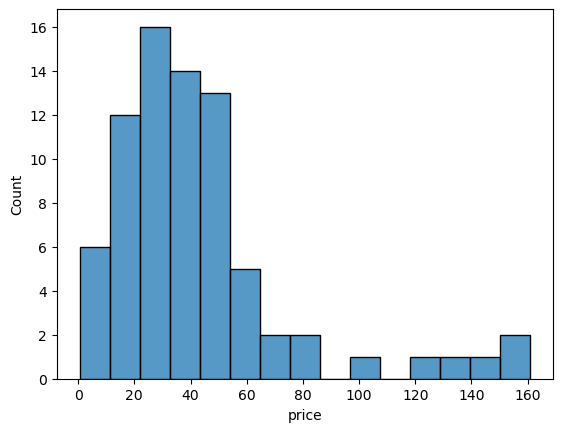

In [23]:
sns.histplot(hirank)

In [24]:
hirank.mean()

42.54710526315787

In [25]:
lowrank=train[train['rank']==0]['price']

In [26]:
train[train['rank']==0]['price'].var()

8125.636093228698

<AxesSubplot:xlabel='price', ylabel='Count'>

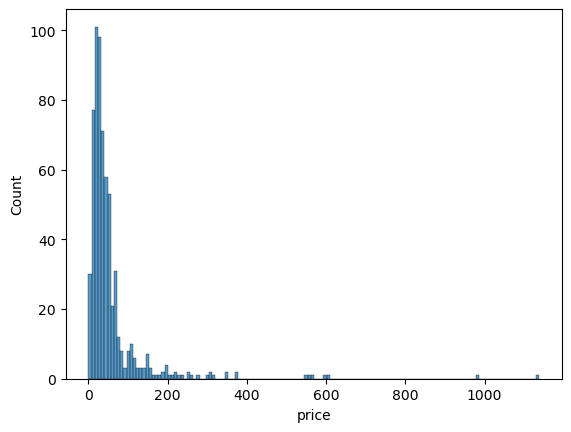

In [27]:
sns.histplot(lowrank)

In [28]:
lowrank.mean()

56.44161552500016

In [29]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=-2.674782496465062, pvalue=0.9960091240750775)

In [30]:
stats.ttest_ind(hirank, lowrank, alternative='less', equal_var=False)

Ttest_indResult(statistic=-2.674782496465062, pvalue=0.003990875924922544)

* pvalue indicates that high rated games have a significantlly lower price than other games
* this actually is the opposite result of the initial question
* mean price difference is ~14$

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>Is the msrp of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average msrp of higher rated games and other games</dd>
        <dd>- $H_a$: The average msrp of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [31]:
hirank=train[train['rank']==1]['msrp']

In [32]:
hirank.var()

634.5115428070175

<AxesSubplot:xlabel='msrp', ylabel='Count'>

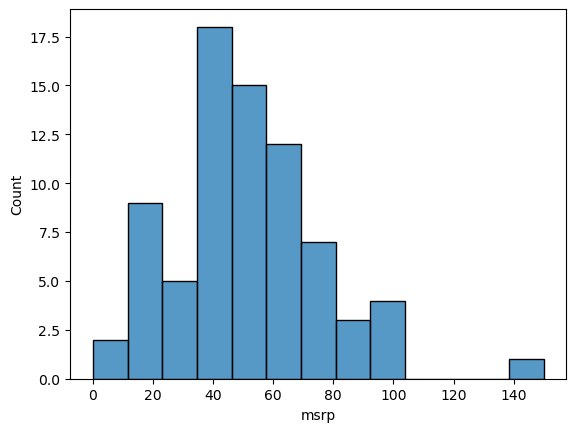

In [33]:
sns.histplot(hirank)

In [34]:
lowrank=train[train['rank']==0]['msrp']

In [35]:
lowrank.var()

1194.1851720647492

<AxesSubplot:xlabel='msrp', ylabel='Count'>

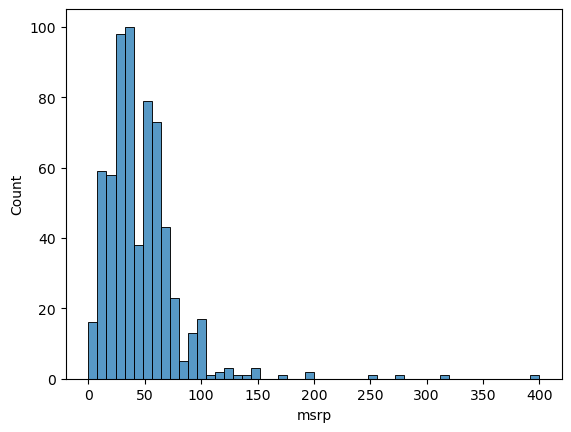

In [36]:
sns.histplot(lowrank)

In [37]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=1.3911842656628044, pvalue=0.0834682122710838)

* pvalue is not lower than the alpha
* overall msrp is not a good indicator of a top rated game

In [38]:
train.head()

name       price   msrp  year_published  \
386                            Bruges   45.456444  41.49          2013.0   
623  Atlantis Rising (second edition)   48.000000  65.00          2022.0   
781                               Bus  235.400000  89.99          1999.0   
105                          Bohnanza   28.000000  19.95          1997.0   
808                        Flip Ships   43.824000  40.00          2017.0   

     min_players  max_players  min_playtime  max_playtime  min_age  \
386          2.0          4.0          60.0          75.0     10.0   
623          1.0          4.0          45.0          90.0     10.0   
781          3.0          5.0         120.0         120.0     14.0   
105          2.0          7.0          45.0          60.0     13.0   
808          1.0          4.0          30.0          45.0      8.0   

     num_user_ratings  average_user_rating  num_user_complexity_votes  \
386               139             3.498201                          0   
623                34             3.959559                          0   
781                40             3.743750                          0   
105               371             3.426649                          2   
808                54             3.479847                          0   

     average_learning_complexity  average_strategy_complexity  rank type  \
386                          0.0                          0.0     0    0   
623                          0.0                          0.0     0    0   
781                          0.0                          0.0     0    0   
105                          2.0                          2.5     0    0   
808                          0.0                          0.0     0    0   

     num_distributors  
386                 0  
623                 0  
781                 1  
105                 4  
808                 0

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>Is the average user rating of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average user rating of higher rated games and other games</dd>
        <dd>- $H_a$: The average user rating of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [39]:
hirank=train[train['rank']==1]['average_user_rating']

In [40]:
hirank.var()

0.0631914901300298

<AxesSubplot:xlabel='average_user_rating', ylabel='Count'>

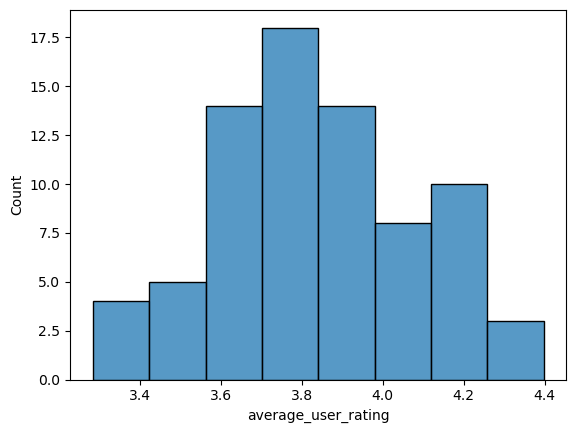

In [41]:
sns.histplot(hirank)

In [42]:
lowrank= train[train['rank']==0]['average_user_rating']

In [43]:
lowrank.var()

0.09776831335440073

<AxesSubplot:xlabel='average_user_rating', ylabel='Count'>

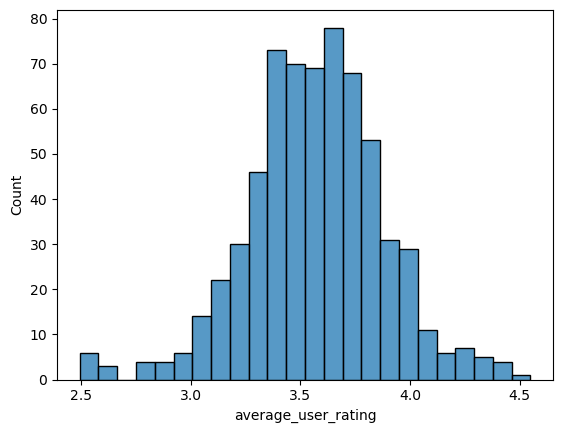

In [44]:
sns.histplot(lowrank)

In [45]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=8.37120932004523, pvalue=1.3589589718655607e-13)

In [46]:
hirank.mean(), lowrank.mean()

(3.829409758058103, 3.5667844994787146)

* the pvalue is lower than the alpha so we can reject the null hypothesis
* even though the pvalue indicates significance, the difference in the averages is only ~0.3 which is not very much
* this also can not be taken to modeling, because you won't know the average user rating until after the game is made. The model will aim to tell if a game will reach a high rank before it is released.

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 4:</h2>
    </header>
    <dl>
        <dt>Is the min_players of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average min_players of higher rated games and other games</dd>
        <dd>- $H_a$: The average min_players of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [47]:
hirank=train[train['rank']==1]['min_players']

In [48]:
hirank.var()

0.2856140350877192

<AxesSubplot:xlabel='min_players', ylabel='Count'>

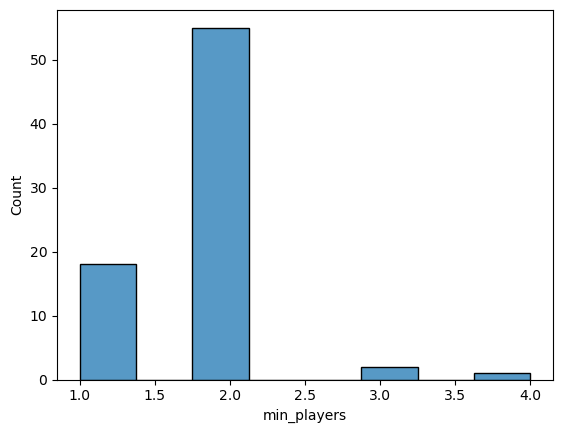

In [49]:
sns.histplot(hirank)

In [50]:
lowrank=train[train['rank']==0]['min_players']

In [51]:
lowrank.var()

0.53012275039124

<AxesSubplot:xlabel='min_players', ylabel='Count'>

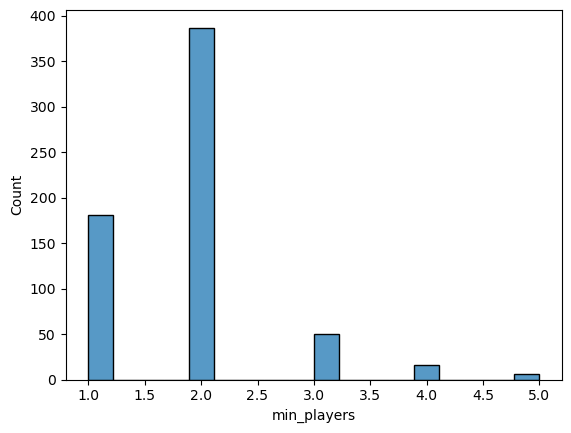

In [52]:
sns.histplot(lowrank)

In [53]:
stats.ttest_ind(hirank, lowrank, alternative='less', equal_var=False)

Ttest_indResult(statistic=-0.8512334048505296, pvalue=0.19823559163700116)

In [54]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=-0.8512334048505296, pvalue=0.8017644083629989)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* min_players is not a significant driver of rank

In [55]:
train.head(5)

name       price   msrp  year_published  \
386                            Bruges   45.456444  41.49          2013.0   
623  Atlantis Rising (second edition)   48.000000  65.00          2022.0   
781                               Bus  235.400000  89.99          1999.0   
105                          Bohnanza   28.000000  19.95          1997.0   
808                        Flip Ships   43.824000  40.00          2017.0   

     min_players  max_players  min_playtime  max_playtime  min_age  \
386          2.0          4.0          60.0          75.0     10.0   
623          1.0          4.0          45.0          90.0     10.0   
781          3.0          5.0         120.0         120.0     14.0   
105          2.0          7.0          45.0          60.0     13.0   
808          1.0          4.0          30.0          45.0      8.0   

     num_user_ratings  average_user_rating  num_user_complexity_votes  \
386               139             3.498201                          0   
623                34             3.959559                          0   
781                40             3.743750                          0   
105               371             3.426649                          2   
808                54             3.479847                          0   

     average_learning_complexity  average_strategy_complexity  rank type  \
386                          0.0                          0.0     0    0   
623                          0.0                          0.0     0    0   
781                          0.0                          0.0     0    0   
105                          2.0                          2.5     0    0   
808                          0.0                          0.0     0    0   

     num_distributors  
386                 0  
623                 0  
781                 1  
105                 4  
808                 0

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 5:</h2>
    </header>
    <dl>
        <dt>Is the max_players of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average max_players of higher rated games and other games</dd>
        <dd>- $H_a$: The average max_players of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [56]:
hirank=train[train['rank']==1]['max_players']

In [57]:
hirank.var()

121.9480701754385

<AxesSubplot:xlabel='max_players', ylabel='Count'>

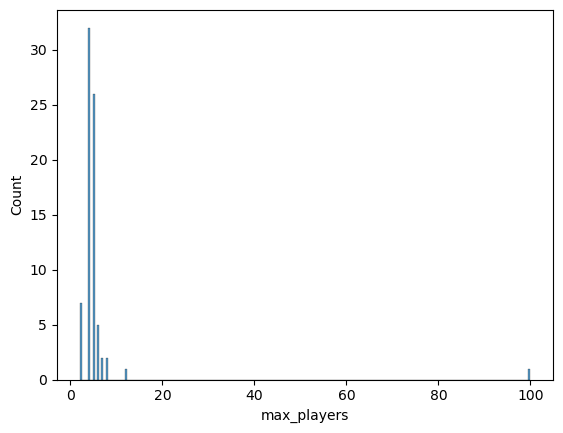

In [58]:
sns.histplot(hirank)

In [59]:
train[train['max_players']>50]

name  price   msrp  year_published  \
406                        Zombie Dice   8.99  13.13          2010.0   
39                       Welcome to...  19.49  29.95          2018.0   
112  Cartographers: A Roll Player Tale  17.19  24.95          2019.0   
642                                SET  11.99  12.99          1988.0   

     min_players  max_players  min_playtime  max_playtime  min_age  \
406          2.0         99.0          12.0          20.0     10.0   
39           1.0        100.0          25.0          30.0     10.0   
112          1.0        100.0          30.0          45.0     10.0   
642          1.0         99.0          30.0          30.0      6.0   

     num_user_ratings  average_user_rating  num_user_complexity_votes  \
406               215             2.816412                          0   
39                351             3.804822                          6   
112               190             4.034132                          4   
642               134             2.962313                          1   

     average_learning_complexity  average_strategy_complexity  rank type  \
406                         0.00                     0.000000     0    0   
39                          2.00                     2.666667     1    0   
112                         1.75                     2.500000     0    0   
642                         1.00                     1.000000     0    0   

     num_distributors  
406                 5  
39                  6  
112                 8  
642                 0

In [60]:
lowrank=train[train['rank']==0]['max_players']

In [61]:
lowrank.var()

46.92272838419377

<AxesSubplot:xlabel='max_players', ylabel='Count'>

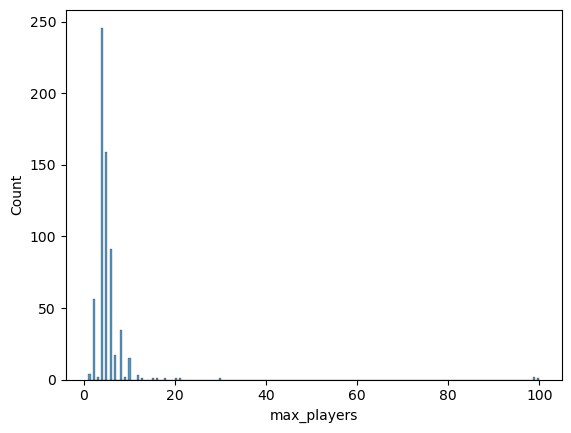

In [62]:
sns.histplot(lowrank)

In [63]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=0.3111490835683894, pvalue=0.378238503578918)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* similar to min_players, max_players is not a significant driver of rank

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 6:</h2>
    </header>
    <dl>
        <dt>Is the min_playtime of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average min_playtime of higher rated games and other games</dd>
        <dd>- $H_a$: The average min_playtime of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [64]:
hirank=train[train['rank']==1]['min_playtime']

In [65]:
hirank.var()

1149.508771929825

<AxesSubplot:xlabel='min_playtime', ylabel='Count'>

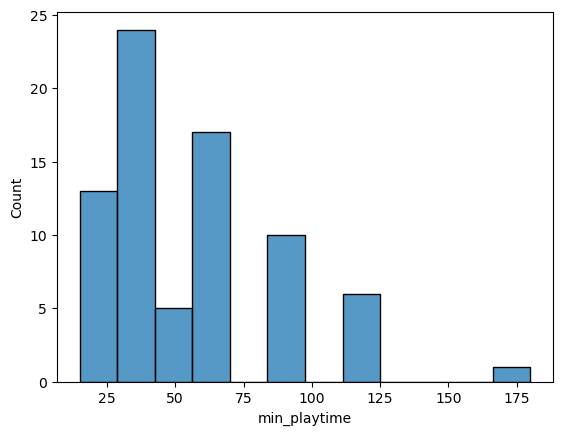

In [66]:
sns.histplot(hirank)

In [67]:
lowrank=train[train['rank']==0]['min_playtime']

In [68]:
lowrank.var()

1517.6717502934346

<AxesSubplot:xlabel='min_playtime', ylabel='Count'>

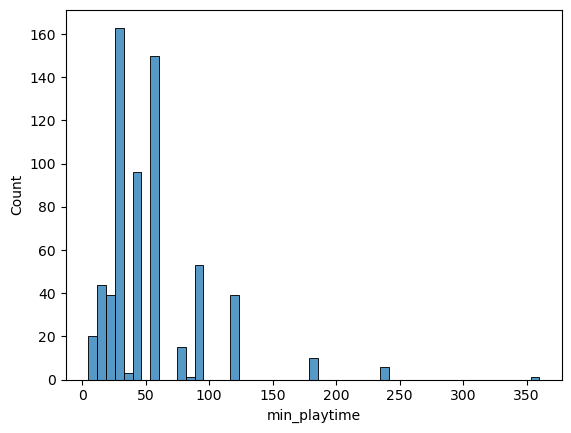

In [69]:
sns.histplot(lowrank)

In [70]:
stats.ttest_ind(hirank, lowrank, alternative='greater')

Ttest_indResult(statistic=-0.10326335477887541, pvalue=0.5411085224847587)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* min_playtime is not a significant driver of rank

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 7:</h2>
    </header>
    <dl>
        <dt>Is the max_playtime of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average max_playtime of higher rated games and other games</dd>
        <dd>- $H_a$: The average max_playtime of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [71]:
hirank=train[train['rank']==1]['max_playtime']

In [72]:
hirank.var()

3011.982280701755

<AxesSubplot:xlabel='max_playtime', ylabel='Count'>

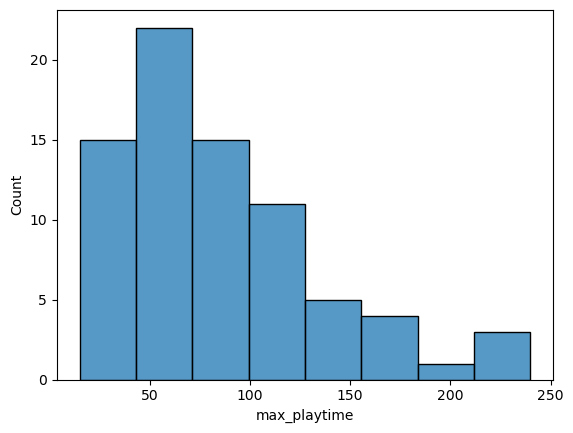

In [73]:
sns.histplot(hirank)

In [74]:
lowrank=train[train['rank']==0]['max_playtime']

In [75]:
lowrank.var()

4528.1552327855625

<AxesSubplot:xlabel='max_playtime', ylabel='Count'>

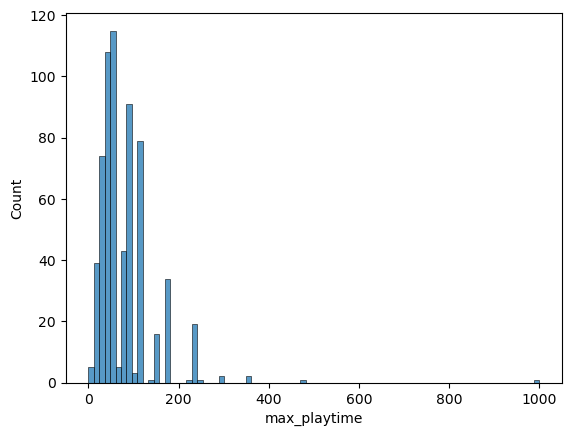

In [76]:
sns.histplot(lowrank)

In [77]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=0.7563281649461554, pvalue=0.22558295915180981)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* max_playtime is not a significant driver of rank

In [78]:
train.head()

name       price   msrp  year_published  \
386                            Bruges   45.456444  41.49          2013.0   
623  Atlantis Rising (second edition)   48.000000  65.00          2022.0   
781                               Bus  235.400000  89.99          1999.0   
105                          Bohnanza   28.000000  19.95          1997.0   
808                        Flip Ships   43.824000  40.00          2017.0   

     min_players  max_players  min_playtime  max_playtime  min_age  \
386          2.0          4.0          60.0          75.0     10.0   
623          1.0          4.0          45.0          90.0     10.0   
781          3.0          5.0         120.0         120.0     14.0   
105          2.0          7.0          45.0          60.0     13.0   
808          1.0          4.0          30.0          45.0      8.0   

     num_user_ratings  average_user_rating  num_user_complexity_votes  \
386               139             3.498201                          0   
623                34             3.959559                          0   
781                40             3.743750                          0   
105               371             3.426649                          2   
808                54             3.479847                          0   

     average_learning_complexity  average_strategy_complexity  rank type  \
386                          0.0                          0.0     0    0   
623                          0.0                          0.0     0    0   
781                          0.0                          0.0     0    0   
105                          2.0                          2.5     0    0   
808                          0.0                          0.0     0    0   

     num_distributors  
386                 0  
623                 0  
781                 1  
105                 4  
808                 0

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 8:</h2>
    </header>
    <dl>
        <dt>Is the min_age of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average min_age of higher rated games and other games</dd>
        <dd>- $H_a$: The average min_age of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [79]:
hirank=train[train['rank']==1]['min_age']

In [80]:
hirank.var()

4.822456140350878

<AxesSubplot:xlabel='min_age', ylabel='Count'>

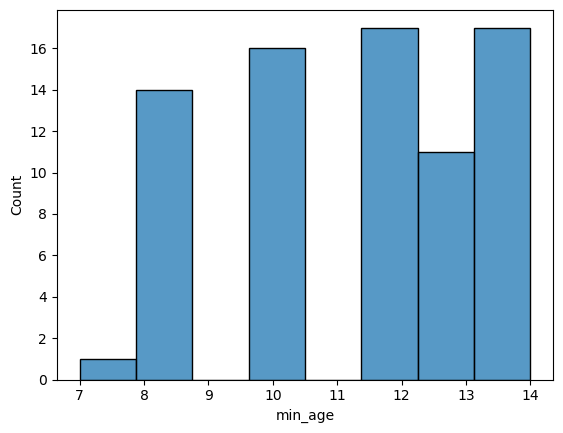

In [81]:
sns.histplot(hirank)

In [82]:
lowrank=train[train['rank']==0]['min_age']

In [83]:
lowrank.var()

5.690823063380294

<AxesSubplot:xlabel='min_age', ylabel='Count'>

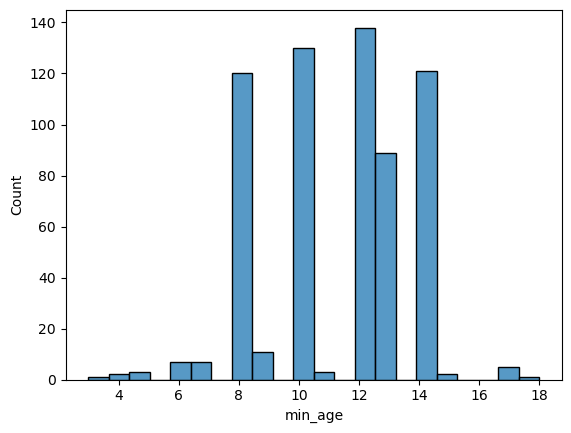

In [84]:
sns.histplot(lowrank)

In [85]:
stats.ttest_ind(hirank, lowrank, alternative='greater')

Ttest_indResult(statistic=0.6900247722549727, pvalue=0.24520141265934886)

* the pvalue is not lower than the alpha so we can not reject the null hypothesis
* min_age is not a significant driver of rank

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 9:</h2>
    </header>
    <dl>
        <dt>Is the num_distributors of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average num_distributors of higher rated games and other games</dd>
        <dd>- $H_a$: The average num_distributors of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [86]:
hirank=train[train['rank']==1]['num_distributors']

In [87]:
hirank.var()

6.426666666666667

<AxesSubplot:xlabel='num_distributors', ylabel='Count'>

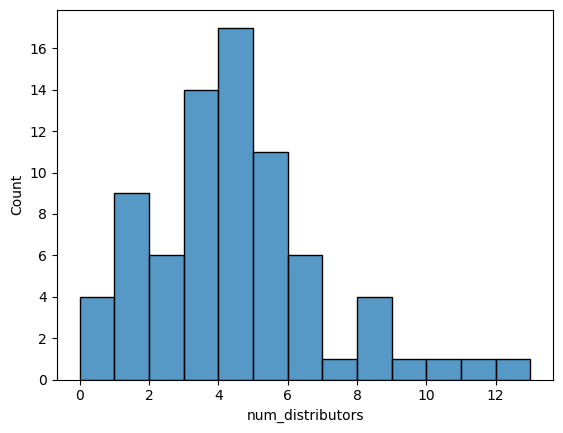

In [88]:
sns.histplot(hirank)

In [89]:
lowrank=train[train['rank']==0]['num_distributors']

In [90]:
lowrank.var()

4.561023082942098

<AxesSubplot:xlabel='num_distributors', ylabel='Count'>

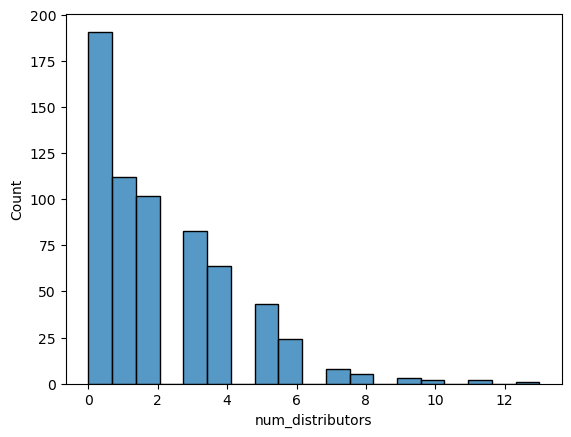

In [91]:
sns.histplot(lowrank)

In [92]:
stats.ttest_ind(hirank, lowrank, alternative='greater')

Ttest_indResult(statistic=7.0973865909179885, pvalue=1.5364921060137039e-12)

* the pvalue is lower than the alpha so we reject the null hypothesis
* number of distributors is a driver of rank.

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 10:</h2>
    </header>
    <dl>
        <dt>Is the year_published of a high rated game significantlly higher than other games?</dt>
        <dd>- $H_0$: There is no difference in the average year_published of higher rated games and other games</dd>
        <dd>- $H_a$: The average year_published of high rated games is significantlly higher than other games.</dd>
    </dl>
</div>

In [93]:
hirank=train[train['rank']==1]['year_published']

In [94]:
hirank.var()

24.000526315789497

<AxesSubplot:xlabel='year_published', ylabel='Count'>

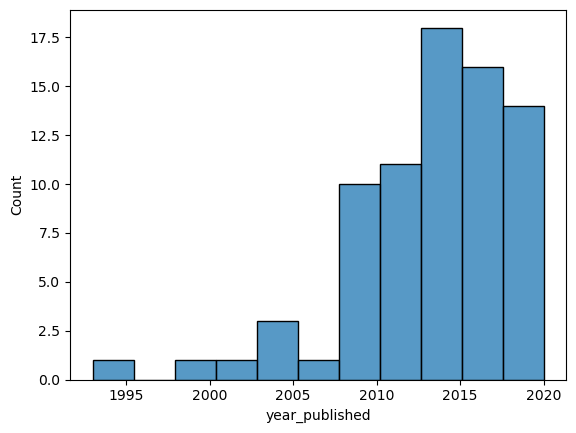

In [95]:
sns.histplot(hirank)

In [96]:
lowrank=train[train['rank']==0]['year_published']

In [97]:
lowrank.var()

1638.9000000000026

<AxesSubplot:xlabel='year_published', ylabel='Count'>

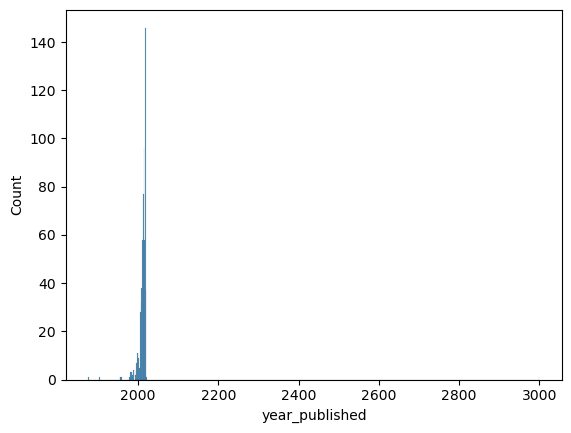

In [98]:
sns.histplot(lowrank)

In [99]:
train[train['year_published']>2022]

name  price  msrp  year_published  min_players  max_players  \
616  Backgammon   5.29  5.99          3000.0          2.0          2.0   

     min_playtime  max_playtime  min_age  num_user_ratings  \
616          30.0          30.0      8.0               124   

     average_user_rating  num_user_complexity_votes  \
616             3.077471                          3   

     average_learning_complexity  average_strategy_complexity  rank type  \
616                          2.0                     2.666667     0    0   

     num_distributors  
616                 1

In [100]:
for i, row in df.iterrows():
    if row['year_published']==3000:
        df.loc[i, 'year_published'] = (-3000)

In [101]:
train, val, test= ex.tts(df, 'rank')

In [102]:
train[train['year_published']<0]

name  price  msrp  year_published  min_players  max_players  \
616  Backgammon   5.29  5.99         -3000.0          2.0          2.0   

     min_playtime  max_playtime  min_age  num_user_ratings  \
616          30.0          30.0      8.0               124   

     average_user_rating  num_user_complexity_votes  \
616             3.077471                          3   

     average_learning_complexity  average_strategy_complexity  rank type  \
616                          2.0                     2.666667     0    0   

     num_distributors  
616                 1

In [103]:
lowrank=train[train['rank']==0]['year_published']

In [104]:
lowrank.var()

39349.69812206579

<AxesSubplot:xlabel='year_published', ylabel='Count'>

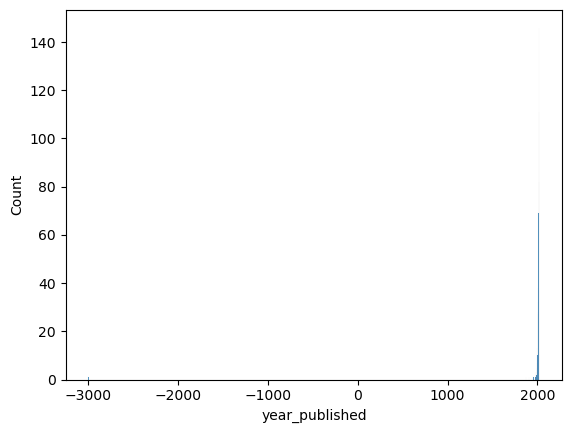

In [105]:
sns.histplot(lowrank)

In [106]:
stats.ttest_ind(hirank, lowrank, alternative='greater', equal_var=False)

Ttest_indResult(statistic=1.2580818214418588, pvalue=0.10440855006423679)

* year_published is not an indicator of if a game is higher rated or not

In [107]:
train[train['rank']==1]

name  price   msrp  year_published  \
35                       Five Tribes  47.49  60.00          2014.0   
54                   Sushi Go Party!  14.99  22.00          2016.0   
11                         Codenames  12.81  19.95          2015.0   
67                          Takenoko  39.06  49.99          2011.0   
32  Clank! A Deck-Building Adventure  44.79  60.00          2012.0   
..                               ...    ...    ...             ...   
87        Star Wars Imperial Assault  11.99  99.95          2014.0   
66                      Gaia Project  75.99  99.95          2017.0   
56          Raiders of the North Sea  43.50  55.00          2015.0   
79      Paladins of the West Kingdom  36.52  55.00          2019.0   
92               Century: Spice Road  27.00  39.99          2017.0   

    min_players  max_players  min_playtime  max_playtime  min_age  \
35          2.0          4.0          60.0          90.0     13.0   
54          2.0          8.0          30.0          45.0      8.0   
11          2.0          8.0          15.0          15.0     10.0   
67          2.0          4.0          45.0          60.0     13.0   
32          2.0          4.0          30.0          60.0     13.0   
..          ...          ...           ...           ...      ...   
87          2.0          5.0          90.0         240.0     13.0   
66          1.0          4.0          60.0         150.0     14.0   
56          2.0          4.0          60.0         120.0     12.0   
79          1.0          4.0          90.0         120.0     12.0   
92          2.0          5.0          30.0          45.0      8.0   

    num_user_ratings  average_user_rating  num_user_complexity_votes  \
35               435             3.827832                          2   
54               427             3.578785                          6   
11               890             3.664894                         10   
67               436             3.473755                          2   
32               444             3.799500                          3   
..               ...                  ...                        ...   
87               244             3.796952                          1   
66               189             4.152593                          3   
56               295             3.915957                          2   
79               138             4.166286                          5   
92               341             3.604559                          3   

    average_learning_complexity  average_strategy_complexity  rank type  \
35                     3.000000                     3.500000     1    0   
54                     2.166667                     2.333333     1    0   
11                     1.100000                     2.200000     1    0   
67                     2.500000                     2.000000     1    0   
32                     2.333333                     2.000000     1    0   
..                          ...                          ...   ...  ...   
87                     3.000000                     2.000000     1    0   
66                     4.000000                     4.333333     1    0   
56                     3.000000                     3.000000     1    0   
79                     4.000000                     3.800000     1    0   
92                     2.000000                     3.000000     1    0   

    num_distributors  
35                 4  
54                 3  
11                10  
67                 3  
32                 4  
..               ...  
87                 5  
66                 3  
56                 3  
79                 3  
92                 3  

[76 rows x 17 columns]

<div class="alert alert-info">
    <header>
    <h2>Exploration Summary</h2>
    </header>
    <dl>
        <dt>No features were found to be significant of higher rated games other than number of distributors. This is interesting, because that means that regardless of the features of a board game they all have a chance to do well and be higher rated. There were a number of more popular mechanics for board games which can be used to increase the liklihood of a game being higher rated.</dt>
    </dl>
</div>

In [108]:
top=pd.read_csv('top_100_mechanics.csv')

In [109]:
top.shape

(582, 1)

In [110]:
lower=pd.read_csv('over_100_mechanics.csv')

In [111]:
lower.shape

(3673, 1)

In [112]:
pd.DataFrame(top.value_counts()).head(20)

0
mechanics                     
Hand Management             47
Set Collection              36
Drafting                    24
Variable Player Powers      24
Dice Rolling                22
Worker Placement            20
Cooperative Play            19
Card Drafting               18
Solo / Solitaire Game       17
Tile Placement              17
Modular Board               16
Area Control                16
End Game Bonuses            12
Network and Route Building  12
Grid Movement               11
Engine Building             11
Deck Building               10
Simultaneous Play           10
Contracts                    8
Point to Point Movement      8

In [113]:
pd.DataFrame(lower.value_counts()).head(20)

0
mechanics                         
Hand Management                324
Dice Rolling                   242
Variable Player Powers         233
Set Collection                 211
Card Drafting                  204
Tile Placement                 129
Cooperative Play               125
Worker Placement               110
Modular Board                  110
Area Control                   104
Deck Building                   78
Grid Movement                   76
Area Majority/ Influence        75
Action Point Allowance System   68
Press Your Luck                 65
Area Movement                   60
Take That                       60
Network and Route Building      58
Solo / Solitaire Game           55
Auction                         51

## These are the top 20 mechanics for the top 100 and >100 games.
Most of the mechanics are the same even if they are in slightly different order. However, high rated games have 'end game bonuses', 'drafting', 'engine building', 'Simultaneous play', 'contracts', and 'point to point movement' and lower rated games have 'area majority/influence', 'action point allowance system', 'press your luck', 'area movement', 'take that', and 'auction'  

In an attempt to summarize this difference into words:  
Higher rated games seem to favor and reward more skill based play instead of relying on luck and hindering other players. Higher rated games also seem to stay away from area movement and other area based playstyles like majority/influence; they prefer point to point and grid movement even though grid movement is shared between the two groups. These are the most notable differences with other minor differences.

# Use NLP to explore descriptions

In [162]:
df=pd.read_csv('descriptions.csv')

In [163]:
df.head()

name                                description_preview  rank
0               Root   Find adventure in this marvelous asymmetric g...     1
1             Scythe    Scythe  gives players almost complete contro...     2
2           Wingspan     Wingspan   is a competitive, medium-weight,...     3
3         Gloomhaven    Gloomhaven  is a game of Euro-inspired tacti...     4
4  Terraforming Mars   In the 2400s, mankind begins to terraform the...     5

In [164]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import unicodedata
import re

In [165]:
des = df['description_preview']

In [166]:
des.head()

0     Find adventure in this marvelous asymmetric g...
1      Scythe  gives players almost complete contro...
2       Wingspan   is a competitive, medium-weight,...
3      Gloomhaven  is a game of Euro-inspired tacti...
4     In the 2400s, mankind begins to terraform the...
Name: description_preview, dtype: object

In [167]:
for d in range(0, 978):
    des[d]=des[d].lower()

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_33974/29304116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des[d]=des[d].lower()


In [168]:
des.head()

0     find adventure in this marvelous asymmetric g...
1      scythe  gives players almost complete contro...
2       wingspan   is a competitive, medium-weight,...
3      gloomhaven  is a game of euro-inspired tacti...
4     in the 2400s, mankind begins to terraform the...
Name: description_preview, dtype: object

In [169]:
for d in range(0,978):
    des[d] = unicodedata.normalize('NFKD', des[d]).encode('ascii', 'ignore').decode('utf-8', 'ignore')

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_33974/1262549740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des[d] = unicodedata.normalize('NFKD', des[d]).encode('ascii', 'ignore').decode('utf-8', 'ignore')


In [170]:
des.head()

0     find adventure in this marvelous asymmetric g...
1      scythe  gives players almost complete contro...
2       wingspan   is a competitive, medium-weight,...
3      gloomhaven  is a game of euro-inspired tacti...
4     in the 2400s, mankind begins to terraform the...
Name: description_preview, dtype: object

In [181]:
for d in range(0,978):
    des[d]=des[d].replace('-',' ')

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_33974/2915885779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des[d]=des[d].replace('-',' ')


In [183]:
des.head()

0     find adventure in this marvelous asymmetric g...
1      scythe  gives players almost complete contro...
2       wingspan   is a competitive, medium weight,...
3      gloomhaven  is a game of euro inspired tacti...
4     in the 2400s, mankind begins to terraform the...
Name: description_preview, dtype: object

In [184]:
for d in range(0,978):
    des[d] = re.sub(r"[^a-z0-9'\s]", '', des[d])

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_33974/395194755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des[d] = re.sub(r"[^a-z0-9'\s]", '', des[d])


In [185]:
des.head()

0     find adventure in this marvelous asymmetric g...
1      scythe  gives players almost complete contro...
2       wingspan   is a competitive medium weight c...
3      gloomhaven  is a game of euro inspired tacti...
4     in the 2400s mankind begins to terraform the ...
Name: description_preview, dtype: object

In [189]:
tokenizer = nltk.tokenize.ToktokTokenizer()

for d in range(0,978):
    des[d]=tokenizer.tokenize(des[d], return_str=True)

/var/folders/qf/t052sdrx70bffjpl89m9_hz00000gn/T/ipykernel_33974/717906340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des[d]=tokenizer.tokenize(des[d], return_str=True)


In [190]:
des.head()

0    find adventure in this marvelous asymmetric ga...
1    scythe gives players almost complete control o...
2    wingspan is a competitive medium weight card d...
3    gloomhaven is a game of euro inspired tactical...
4    in the 2400s mankind begins to terraform the p...
Name: description_preview, dtype: object